<a href="https://colab.research.google.com/github/Viku-51/Interest-Rate-Forecasting-Brazilian-CPI-Proxy/blob/main/Brazil_CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving brazil_cpi_final.csv to brazil_cpi_final.csv


In [ ]:
df = pd.read_csv('brazil_cpi_final.csv')


df.head()

,Country,Year,Value
0,Brazil,2000,4.3
1,Brazil,2001,4.6
2,Brazil,2002,5.0
3,Brazil,2003,5.7
4,Brazil,2004,6.1


In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype(str))
df.set_index('Date', inplace=True)
ts = df['Value'].asfreq('YS')  # yearly frequency

In [ ]:
ts.head()


,Value
Date,
2000-01-01,4.3
2001-01-01,4.6
2002-01-01,5.0
2003-01-01,5.7
2004-01-01,6.1


In [ ]:
adf_result = adfuller(ts.dropna())
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.6f}")


ADF Statistic: -0.7165
p-value: 0.842420


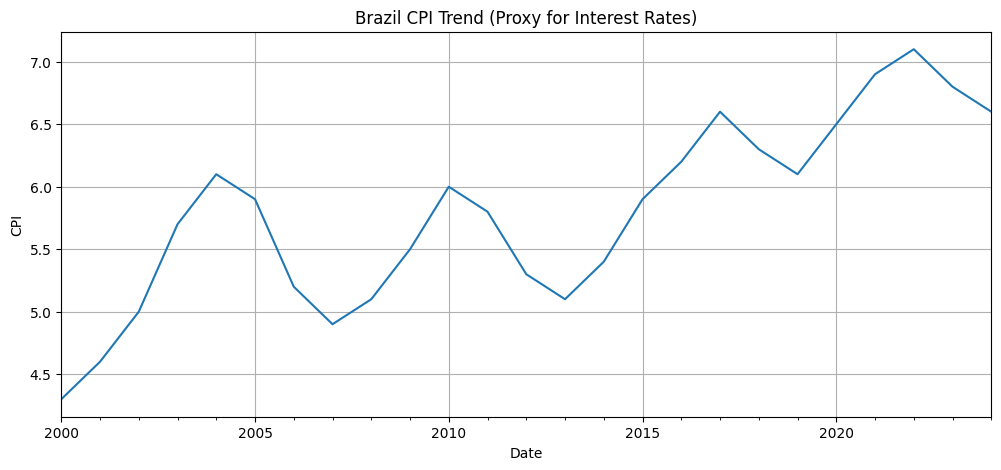

In [ ]:
ts.plot(title='Brazil CPI Trend (Proxy for Interest Rates)', figsize=(12, 5))
plt.ylabel('CPI')
plt.grid(True)
plt.show()


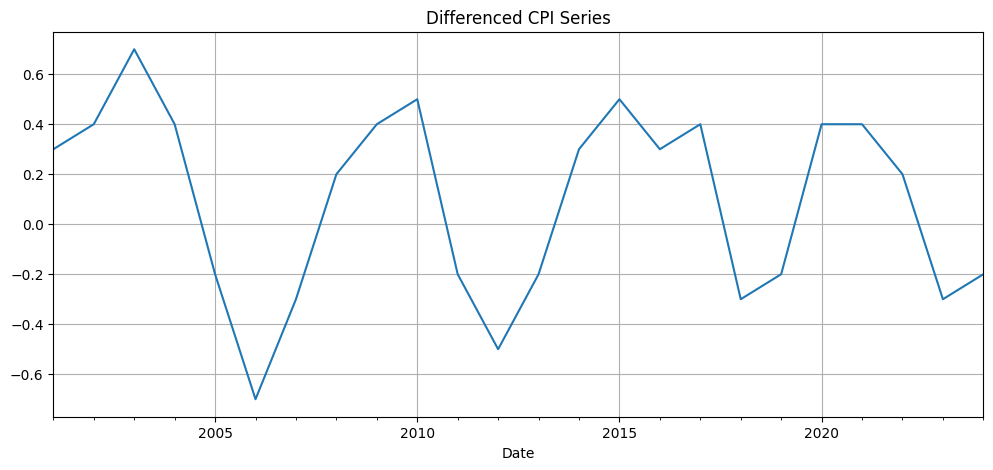

In [ ]:
ts_diff = ts.diff().dropna()

ts_diff.plot(title='Differenced CPI Series', figsize=(12, 5))
plt.grid(True)
plt.show()


In [ ]:
model = ARIMA(ts, order=(1, 1, 1))  # Tune if needed
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -3.652
Date:                Sat, 05 Jul 2025   AIC                             13.305
Time:                        22:12:36   BIC                             16.839
Sample:                    01-01-2000   HQIC                            14.242
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0501      0.242      0.207      0.836      -0.424       0.525
ma.L1          0.9456      0.303      3.123      0.002       0.352       1.539
sigma2         0.0722      0.028      2.542      0.0

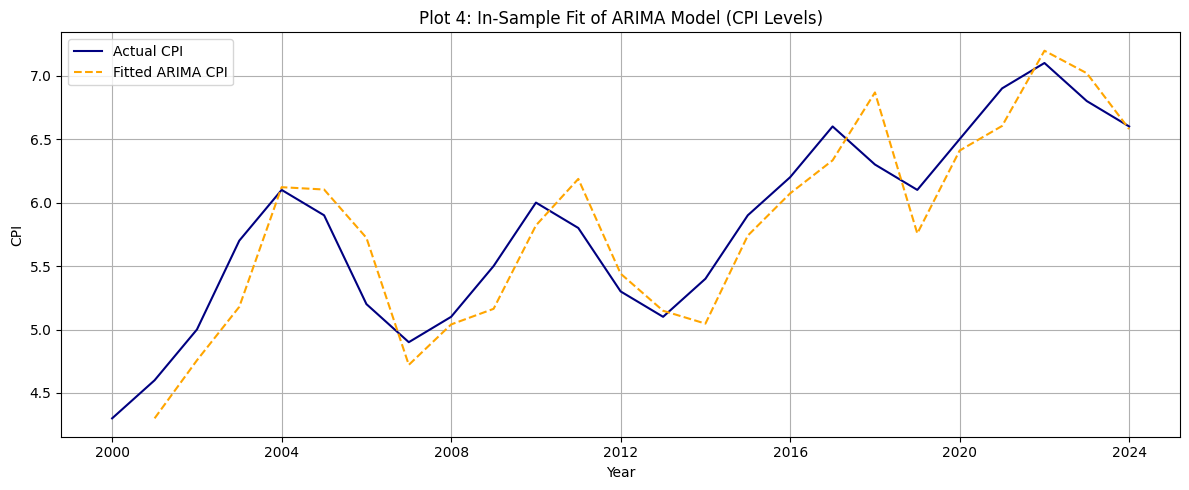

In [ ]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Get in-sample prediction (CPI levels, not differences)
fitted = model_fit.predict(start=ts.index[1], end=ts.index[-1], typ='levels')

# Plot actual vs fitted CPI
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(ts, label='Actual CPI', color='navy')
plt.plot(fitted, label='Fitted ARIMA CPI', color='orange', linestyle='--')
plt.title('Plot 4: In-Sample Fit of ARIMA Model (CPI Levels)')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


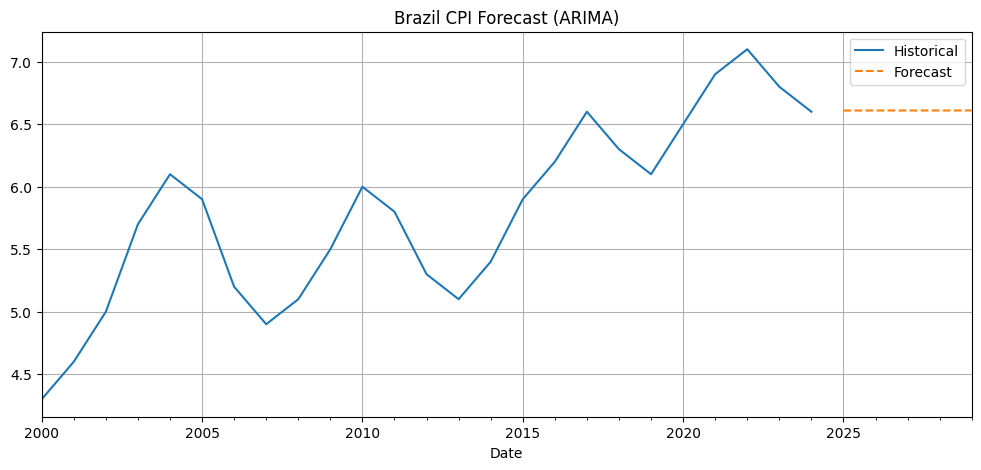

In [ ]:
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS')
forecast = pd.Series(forecast.values, index=forecast_index)

# Plot
plt.figure(figsize=(12, 5))
ts.plot(label='Historical')
forecast.plot(label='Forecast', linestyle='--')
plt.title('Brazil CPI Forecast (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

model_bt = ARIMA(train, order=(1, 1, 1)).fit()
pred_bt = model_bt.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, pred_bt))
print(f"Backtest RMSE: {rmse:.3f}")


Backtest RMSE: 0.464


/tmp/ipython-input-52-477632978.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(summary_df, header=0, index_col=0)[0]


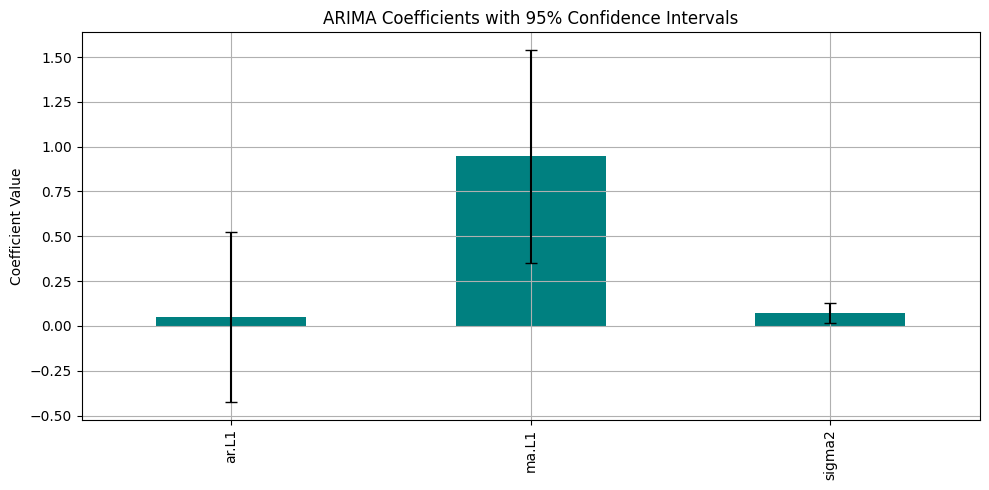

In [ ]:
summary_df = model_fit.summary().tables[1].as_html()
summary_df = pd.read_html(summary_df, header=0, index_col=0)[0]

summary_df['coef'].plot(kind='bar', yerr=1.96 * summary_df['std err'],
                        capsize=4, figsize=(10, 5), color='teal')
plt.title("ARIMA Coefficients with 95% Confidence Intervals")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-53-1845067099.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-53-1845067099.py:41: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-53-1845067099.py:41: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  f

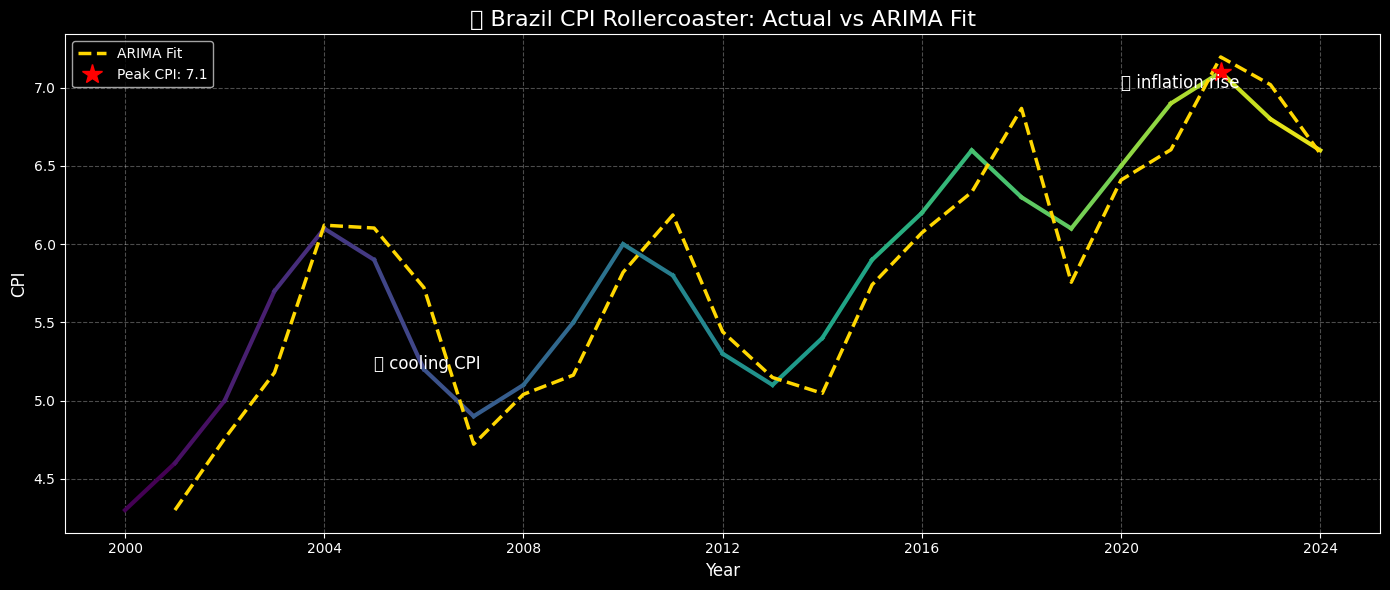

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from statsmodels.tsa.arima.model import ARIMA

# Refit ARIMA
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
fitted = model_fit.predict(start=ts.index[1], end=ts.index[-1], typ='levels')

# Generate gradient color map by year
colors = cm.viridis(np.linspace(0, 1, len(ts)))

# Plot setup
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))

# Plot actual CPI with color gradient
for i in range(len(ts) - 1):
    ax.plot(ts.index[i:i+2], ts.iloc[i:i+2], color=colors[i], linewidth=3)

# Overlay ARIMA prediction as dashed gold line
ax.plot(fitted.index, fitted, linestyle='--', color='gold', linewidth=2.5, label='ARIMA Fit')

# Highlight highest CPI year
max_year = ts.idxmax()
ax.plot(max_year, ts.max(), 'r*', markersize=15, label=f'Peak CPI: {ts.max():.1f}')

# Emojis / text markers (optional, can replace with plt.text)
ax.text(ts.index[-5], ts.iloc[-5] + 0.5, '🚀 inflation rise', fontsize=12)
ax.text(ts.index[5], ts.iloc[5] - 0.7, '📉 cooling CPI', fontsize=12)

# Title + labels
ax.set_title("📈 Brazil CPI Rollercoaster: Actual vs ARIMA Fit", fontsize=16, color='white')
ax.set_ylabel("CPI", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.legend()

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
